# Implementing a Heap With an Array
### Children and Parents With an Array
A binary heap is often implemented as an array by storing the root (the minimial element) in the first position of the array (position 0), its children in the next two positions (positions 1 and 2), and the grandchildren in the next four positions, and so forth, so that the node in position $k$ has its children in positions $2k+1$ and $2k+2$.

In [1]:
#define functions that use the index of a node to find the indices its left and right children.
left_child = lambda k : 2*k+1
right_child = lambda k : 2*k+2

#For convenience, also define a function that finds the parent of a node.
parent = lambda k : (k-1)//2 #integer division discards remainder.

### Inserting Into a Heap: Sifting Up

To be a complete binary tree (property *ii*), every new node added to this array-implementation of a heap must be placed in the leftmost empty position.  The problem is that this node is not necessarily greater than its parent.  To remedy this, we must *sift up*; that is, the new node must swap places with its parent if it is less than its parent.  Repeat this process until the new node is either greater than its parent or it becomes the new root. 

In [2]:
#define a fuction for sifting up
def sift_up(a, k):
    """Sifts up the node at index k inside array a."""
    
    #Have c stand for the current index of the node.
    c = k
    
    #If the node is not currently the root, and it is smaller than its parent...
    while(c>0 and a[c] < a[parent(c)]):
        #Swap the value of the node with the value of its parent.
        a[c], a[parent(c)] = a[parent(c)], a[c]
        #Update the index of the node to the index of where its parent used to be.
        c = parent(c)

    #Once we exit the while loop, the node has been succesfully sifted up.
    return

#define a fuction for inserting into a heap
def insert_into_heap(a, key):
    """Inserts the key into the heap"""
    
    #Insert the new node into the leftmost empty position...
    a.append(key)
    
    #Sift the node up...
    sift_up(a, len(a)-1)
    
    #We're done.
    return

### The Temporal Comlexity of Insertion

The book claims that inserting and sifting up a node has time complexity $O(\log(n))$, where $n$ is the number of nodes.  Let's check that.

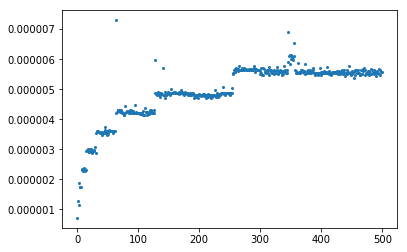

In [3]:
import numpy as np

#get our plotting functions
from matplotlib import pyplot as plt
%matplotlib inline

#we will need to time insertion.
from time import time

#start out with an empty array (list) a.
a = list()
#keep track of the times
times = list()

#Start inserting and sifting up numbers into a.
#always insert something smaller than before, so we have to sift to the top.
for i in range(500, 0, -1):
    
    #record each time how long it takes to sift this value up.
    itimes = list()
    
    #time how long it takes to insert 10 times and take the average.
    for dummy in range(10):
        a_copy = a.copy()
        t = time()
        insert_into_heap(a_copy, i)
        itimes.append(time() - t)
        
    #record the average time for inserting i    
    times.append(np.mean(itimes))
    insert_into_heap(a, i)

#plot the times.
plt.plot(times, 'o', markersize = 2)
plt.show()


### Removing From a Heap: Sifting Down

To remove an element from a heap, we must always remove the rightmost leaf at the bottom of the tree, but the key we want to delete may be contained in another node.  That is, we are deleting a node but keeping its key, and we are deleting a key but keeping its node.  To remedy this, trade the key to be deleted with the bottom rightmost key; that is, put the key from the node that will be deleted into the node of the key that will be deleted.  If the newly created node-key combination is less than its parent, sift up until it is less than its parent.  If it is greater than one of its children, *sift down*, by trading places with the smallest child and repeating as necessary until it satifies the heap ordering property.

In [4]:
#first define a function for sifting down.
def sift_down(a, k):
    """Sifts the node in array a at position k down."""
    
    #Make a function for finding the index of the smallest child of a node.
    def smallest_child(x):
        if(right_child(x) >= len(a) or a[left_child(x)] <= a[right_child(x)]):
            return left_child(x)
        else:
            return right_child(x)
    
    #Have p stand for the current index of the node we are sifting down.
    p = k

    #If the node is not a leaf, and it is larger than its smallest child... 
    while(p<len(a)//2 and a[p] > a[smallest_child(p)]):
        sc = smallest_child(p)
        #Swap the value at the node with the value of its smallest child.
        a[p], a[sc] = a[sc], a[p]
        #Update the index of the node to the former index of the smallest child.
        p = sc

    #When we exit the loop, p is either a leaf or smaller than all of its children.
    return

#then define a function for removing from a heap
def remove_from_heap(a, k):
    """Removes from heapified array a the node at index k"""
    #get the index of the rightmost leaf at the bottom of the tree.
    leaf = len(a)-1
    #swap the leaf key with the key to be deleted.
    a[k], a[leaf] = a[leaf], a[k]
    #remove the leaf node that now contains the key to be deleted.
    a.pop()
    #sift down the key that was moved up from the leaf node.
    sift_down(a, k)
    return

### The Temporal Complexity of Removal

The book claims that deletion requires at most $O(\log(n))$ steps.  Let's test that by starting with a heap of size 5000 and keep on deleting the root, which requires the most sift downs.  We'll plot the times.

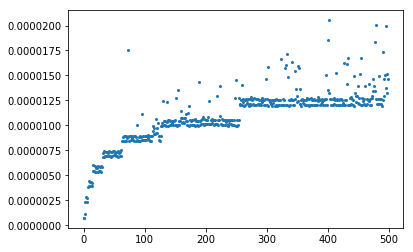

In [5]:
times = list()

#use the same array we created last time.
while(len(a) > 0):
    itimes = list()
    for dummy in range(10):
        a_copy = a.copy()
        t = time()
        remove_from_heap(a_copy, 0) #remove the root
        itimes.append(time() - t)
    times.append(np.mean(itimes))
    remove_from_heap(a,0)

#plot the results, but in reverse because times started from large heap and worked down.
plt.plot(times[::-1], 'o', markersize = 2)
plt.show()

### Constructing a Heap: Heapifying an Array

Building a heap by starting with an empty heap and inserting $n$ nodes into the heap one at a time would have potentially $O(n \log(n))$ operations, so it may be surprising that one can actually build a heap in $O(n)$ time from an unordered array of $n$ elements (we call this *heapifying* the array), as follows.

Treating the array as a tree, with the root in position $0$ and the children of node $k$ in positions $2k+1$ and $2k+2$ means that the tree automatically is a complete binary tree.  Therefore, the only remaining property to safisfy is the heap-ordering property, (i).  The main tool in the heapification process is sifting down, and the success of the process relies on Proposition 3.4.6, which guarantees that if all the elements of a subtree except the root satisfy the heap ordering condition (that is the root nmay be larger than on of its children, but all other nodes in the subtree are less than their children), then sifting the root down until it does satisfy the ordering condition will ensure that the entire subtree satsifies the ordering condition.

Therefore, the strategy is to starty at the bottom, and work upward (backwards through the array), sifting each node down until it satisfies the heap-ordering property.  The leaf nodes are those in the range $\lceil \frac{n}{2} \rceil$ to the end, and all leaves vacuously satisfy the property that they are less than their children (since they have no children).
Starting at the next level, the rightmost node that has a child is in position $\lceil \frac{n}{2} \rceil -1$. Running through the nodes in positions $\lceil \frac{n}{2} \rceil -1$ down to $0$, we sift each node down, as necessary.  Once we have been through all the nodes, the result is a heap.

In [6]:
#create a heapify function
from math import ceil
def heapify(a):
    """Heapifies the array a."""
    for i in range(ceil(len(a)/2)-1, -1, -1):
        sift_down(a, i)
    return

In [7]:
#test it on the array in problem 3.18
a = [5,4,3,2,1]
heapify(a)
print(a)

[1, 2, 3, 5, 4]


### The Temporal Complexity of Heapifying
The book claims that heapify has $O(n)$ temporal complexity.  Let's test that.

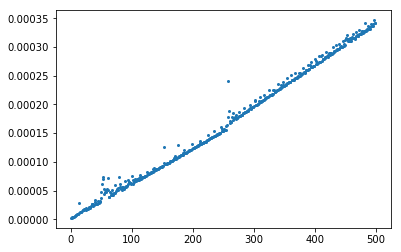

In [18]:
times = list()
for i in range(1,501):
    #make an array that counts downwards so everything has to be sifted down all the way.
    a = list(range(i, -1, -1))
    itimes = list()
    for dummy in range(10):
        t = time()
        heapify(a)
        itimes.append(time() - t)
    times.append(np.mean(itimes))

plt.plot(times, 'o', markersize = 2)
plt.show()